# ILI9341

Comprehensive code analysis of the ILI9341 Library.

## Fonts

In the glcdfont.h file, we'll see the following code

The *#ifndef* command basically checks whether there has been previous definition of the code. 

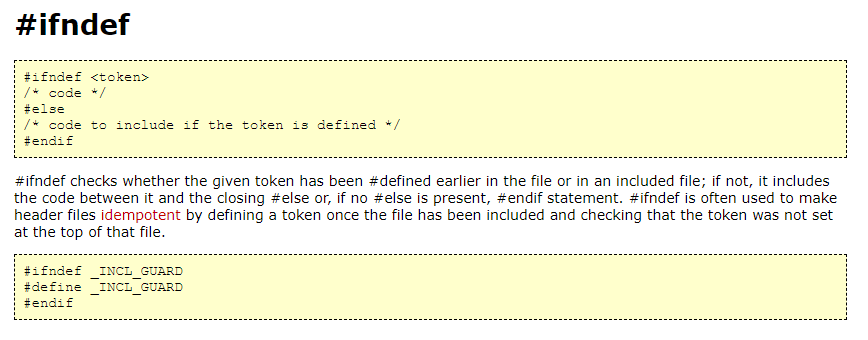

After the *#ifndef* command, we have these long array of values. These is the font type that we are going to use. In this [video](https://www.youtube.com/watch?v=L8MmTISmwZ8), the author will explain how can we make our own font using the fontconvert tool and save it as **.h**. There are versions of this font code such as from Myaqoob where he used 

instead of 

Although this variation may not affect the code generally. Here we discuss, how these prefixes is used.

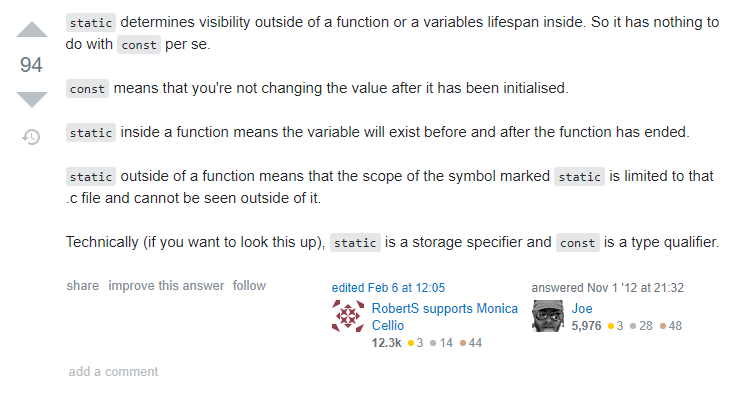

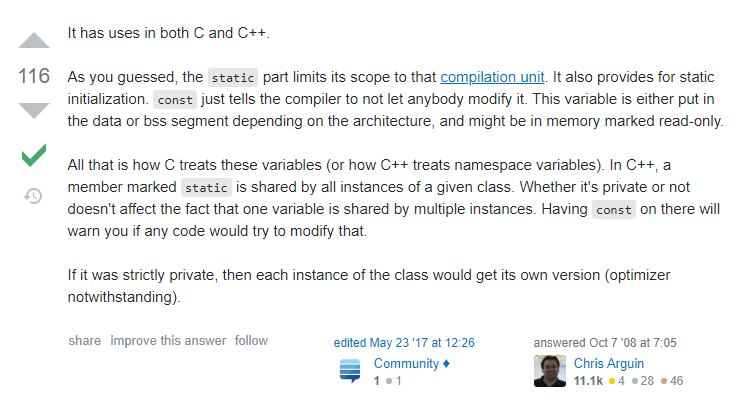

                                                   <intentional space>

## Configuration and Colors

This can be found at config.h file. 

Basically, these are just pin configuration. The four top pins are GPIO_Output while the bottom pins are the for the SPI interface, that is, MOSI, SCK, MISO.

Here are the color definitions. Basically, the ILI9341 operates at 16-bit color definition. Color depth is the number of colors that can be used for each pixel on the display. This can range from 8- bit color, 16-bit high color to 24-bit true color. The range of color is determined by how many bits of red, green and blue (RGB) each pixel is assigned to the frame buffer.

A pixel’s color value is measured in bits-per-pixel or bpp. These colors are then color mapped from the signals in a variety of combinations. Memory, frame buffering, and bandwidth can be trade off’s for higher color depth and should be considered when choosing color depth of the display. Below are some typical color depths and their characteristics.

![16_bit_color.PNG](ILI9341_Images\16_bit_color.PNG)

![16_bit_color1.PNG](ILI9341_Images\16_bit_color1.PNG)

In summary, the higher color definition we wanted, needs more RAM space and also faster memory to refresh the screen at a fast rate. We can see this information at page 55/233 of the datasheet. 

![color_table.PNG](ILI9341_Images\color_table.PNG)
![color_table.PNG](ILI9341_Images\color_table1.PNG)
![color_table.PNG](ILI9341_Images\color_table2.PNG)

As we can see from the table, the red has 5 bits, green has 6 bits, and the blue has 5 bits which sum to 16 bits of color definition per pixel.

                                                   <intentional space>

## Commands

This can be found at the commands.h file. Since this a long header file, we will study block by block of code. 


We already know this code, just to avoid double definition.

### Level 1 Commands

#### Software Reset

The list of commands can be found at page 83/233 of the datasheet. 

![commands.PNG](ILI9341_Images\commands.PNG)

The software reset command is under the level 1 command. Moving on to page 90/233 of the datasheet.

![software_reset.PNG](ILI9341_Images\software_reset.PNG)

![software_reset.PNG](ILI9341_Images\software_reset1.PNG)

The values that determine the hex value for a specific command are the D0 - D7. Since, D0 = 1, the binary is

The rest of the command can be found in a similar. 

The rest of the codes are discussed briefly in the datasheet, so there will be no furthere discussion. 

The last line of code is for the fixed width and height of the LCD.

                                                 <Intentional Space>

## Core.c

The following file discusses all the hardware level functions that is used to draw images to the LCD.

Opening the core.h file, we'll see a bunch of 

#ifndef TEST1_ILI9341_CORE_H
#define TEST1_ILI9341_CORE_H

Include header files.

These two are preprocessor directives that is defining functions. This is also called the function-like macros.

[Detour - Function-Like Macros](#1)

<a id='1_r'></a>



The next line of codes are function prototypes which are defined at core.c file. To review the function prototypes,

[Detour - Function Prototypes](#2)

<a id='2_r'></a>

The values for *LCD_PIXEL_WIDTH* and *LCD_PIXEL_HEIGHT* were already defined at command.h file. 

This is an array that contains all the values essential for the different commands. 

### *LCD_pinsInit()*

These are just initialization of the SPI and GPIO structs. This will be done for us by HAL. 

The clock configuration.

The GPIO and SPI configuration.

The *TFT_RST_RESET;* is a macro or preprocessor directive that is defined at control.h file. 

Now, this RESET pin is the TFT reset pin which we already seen at the config.h file. To review,

We will not look further at the delay function since we will be using *HAL_Delay()*.

Looking at the definitions of *dmaSendCmd()* which is obviously located at dma.c file. 

The *u8* is the data type of the parameter being passed and clearly means *uint8_t*. The *u8* is not another data type which you might think defined somewhere in the code. This is known to the compiler and associated with Linux.

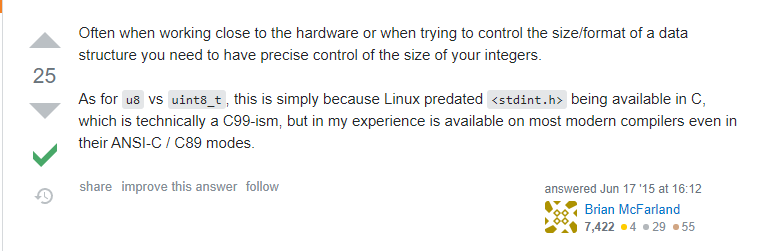

The variable *cmd* is equal to *LCD_SLEEP_OUT* which is defined at commands.h file.

This means we are effectively passing the value 0x11 into the function. The *TFT_CS_RESET* can be found at control.h file  

The function *GPIO_ResetBits()* is from STM32F10x Standard Peripherals Library. 

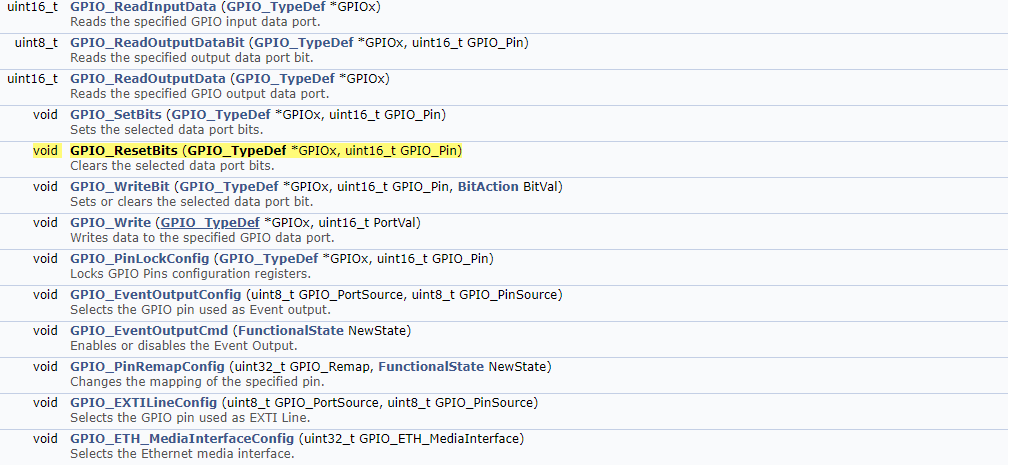

which as you can see that the first parameter accepts the GPIO Port and the second parameter is GPIO Pin. As explained, this resets the pin or make it LOW. Hence, we have shown that the *TFT_CS_RESET* drives the CS pin LOW and will be the same thing for *TFT_DC_RESET*. The next line is 

We have to look for the function *dmaSend8()* which is also at the same file.

The code *DMA_StructInit(&dmaStructure);* means that we make an instance of a struct whic will store all the configurations inside this function. We won't be able to find the definition of *DMA_StructInit()* since it is native Standard Peripheral Library. 

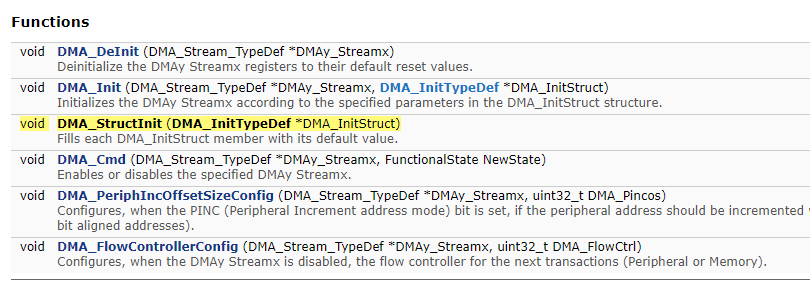

To explain further, we also have to look at the other functions *dmaSend16()*, and *dmaSendCircular16()*. Basically, all these functions are literally just the same with some few minor differences. For *dmaSend16()* the onyl difference are parameter type, 

and the memory data size and peripheral data size. Instead of using Byte for uint8_t, it uses a HalfWord for uint16_t.

For *dmaSendCircular16()*, this is just the same as *dmaSend16()* except for one line of code:

That is, the mode is circular. The circular mode means after the buffer overflows, it resets the counter to the top. Hence, going back, *dmaSend8()* is just setting up all the necessary configuration to send an 8-bit data or 1-byte data via DMA SPI. Next, 

Looking at the definition which is located at dma.h. 

This is a macro which includes the function *DMA_Init()* and *DMA_Cmd()* which are also native to the Standard Peripheral Library.

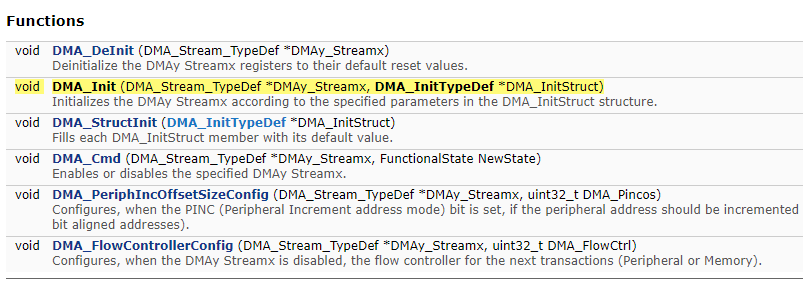

This code initializes all the configurations in the struct we've instantiated previously. The *DMA_Cmd()*: 

This function may be used to perform Pause-Resume operation. When a transfer is ongoing, calling this function to disable the Stream will cause the transfer to be paused. All configuration registers and the number of remaining data will be preserved. When calling again this function to re-enable the Stream, the transfer will be resumed from the point where it was paused.

From here, we're not really sure what is going on since we know that SPI don't work like I2C where we set a specified address and write data to that address. To investigate, let's look at the same lines of codes by Myaqoob library. 

### Myaqoob library ILI9341_SLEEP_OUT	

We start by locating the name of the definition of Sleep out at MY_ILI9341.h file.

Searching the MY_ILI9341.c file for the code *ILI9341_SLEEP_OUT*, we can find 

Jumping to the definition of *ILI9341_SendCommand()* which is also written in the same file. 

As we can see, we are passing the uint8_t value which is 0x11 into this function which is similar to what we've done at *dmaSendCmd(LCD_SLEEP_OUT)*. 

Then we create a new variable *tmpCmd* to store the 0x11. The next two lines are just the same to what we've done before. We set the DC and CS pin low. For comparison purposes, we'll write below the function using the libray we used before.

The next line is where the code gets interesting. 

It's quite confusing at first how the CubeHAL implements all their communication but they are all similar to one another. In the book of Carmine Noviello - Mastering STM32, he didn't explained the parameters of the  *HAL_SPI_Transmit()* function but refers to the other communication function he discussed before SPI and one of those is USART/UART. At the page 265-266/783 of his book, we'll find that he discussed the each of the parameter of *HAL_UART_Transmit()*.

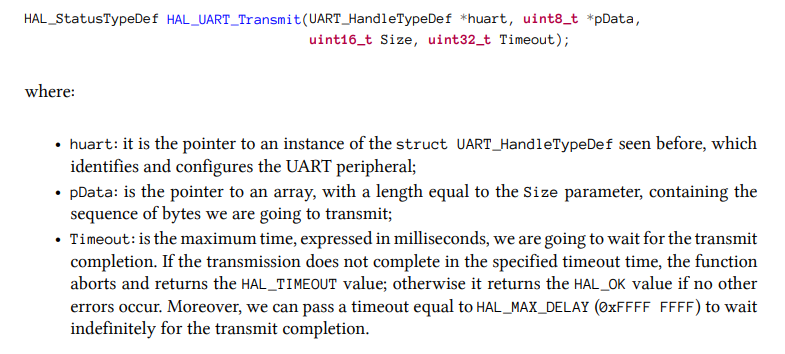

By now, we should be familiar that all the configuration of different HAL functionalities are stored in a struct and the first parameter of is always the address of the struct instance. In this example, **huart* is the address of the struct instance of type UART_HandleTypeDef. Take note that he used the term "pointer" and not address since address is stored at pointer variables but basically what the value you passed in the first parameter is an address. The **pData* is a similar pointer variable containing the address of the value you want to pass. So for example, we have

That means the address of the var containing a value of 0x00FF is varaddr and this is a pointer type variable. This is basically the same thing happens in the code since the library passed  

The list of commands can be found at page 83/233 of the datasheet. 

![commands.PNG](ILI9341_Images\commands.PNG)

But before we can dive into this, let's look at the page 60/233 of the datasheet. We can see the SPI connection having 3 line Serial interface. The SPI connection consists of MOSI, MISO, and SCK, thus 3 line serial interface. 

![3_line_interface.PNG](ILI9341_Images\3_line_interface.PNG)

In 3-line serial interface, different display data format is available for two color depths:

- 65k colors, RGB 5, 6, 5 -bits input 
- 262k colors, RGB 6, 6, 6 -bits input. 

The 18-bit pixel information is transmitted as follows:

![18_bit_pixel.PNG](ILI9341_Images\18_bit_pixel.PNG)


<a id='1'></a>

To define a function-like macro, specify an identifier name followed by a parenthesized parameter list in parenthesis and the replacement tokens. The parameters are imbedded in the replacement code. White space cannot separate the identifier (which is the name of the macro) and the left parenthesis of the parameter list. A comma must separate each parameter. For portability, you should not have more than 31 parameters for a macro.

Use function-like macros in your program as follows. In the body of your program source, insert a defined function-like macro name followed by a list of arguments in parentheses. A comma must separate each argument. Once the preprocessor identifies a function-like macro invocation, argument substitution takes place. Parameters in the replacement code are replaced by the corresponding arguments. Any macro invocations contained in an argument itself are completely replaced before the argument replaces its corresponding parameter in the replacement code.

![function_like_macros.PNG](ILI9341_Images\function_like_macros.PNG)

[Return - Function-like Macros](#1_r) 

<a id='2'></a>

A function prototype is closely related to the definition of a prototype. Below we'll understand why it is necessary to have

![function_prototype.PNG](HAL_GPIO_Images/function_prototype.PNG)

![function_prototype1.PNG](HAL_GPIO_Images/function_prototype1.PNG)

[Return - Function Prototypes](#2_r)